In [4]:
!pip install TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl

Processing c:\users\nk\desktop\eth\ta_lib-0.4.17-cp37-cp37m-win_amd64.whl

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\NK\\Desktop\\ETH\\TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl'



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,2)

In [10]:
DF = pd.read_csv('LONG_DATASET.csv')
DF.columns

Index(['Date', 'ETH_DOLLAR', 'ETH_BTC', 'Price_Diff', 'Volume',
       'Num_of_Trades', 'transactions', 'size', 'sentbyaddress', 'difficulty',
       'hashrate', 'mining_profitability', 'sentinusd', 'transactionfees',
       'median_transaction_fee', 'confirmationtime', 'transactionvalue',
       'marketcap', 'tweets', 'google_trends', 'mediantransactionvalue',
       'fee_to_reward', 'fear_gear_index', 'Classification'],
      dtype='object')

In [12]:
DF = DF.drop(["median_transaction_fee"], axis=1)
DF.isna().sum()

KeyError: "['median_transaction_fee'] not found in axis"

In [3]:
def target_shift(df,col):
    df['next_day_ETH_price'] = col
    df['next_day_ETH_price'] = df['next_day_ETH_price'].shift(-1,fill_value=1).values
    df = df.iloc[:-1,:]
    return df

In [4]:
DF = target_shift(DF,DF['ETH_DOLLAR'])
DF

,Date,ETH_DOLLAR,ETH_BTC,Price_Diff,Volume,Num_of_Trades,transactions,size,sentbyaddress,difficulty,...,confirmationtime,transactionvalue,marketcap,tweets,google_trends,mediantransactionvalue,fee_to_reward,fear_gear_index,Classification,next_day_ETH_price
0,2018-07-25,472.10,0.057765,21.77,1.704755e+05,118086,787527.0,24159.0,289146.0,3.475588e+15,...,0.244,920.126,4.790803e+10,14514.0,5.010,NaN,1.963,54,Neutral,462.64
1,2018-07-26,462.64,0.058309,25.00,1.739762e+05,107846,725630.0,23504.0,247892.0,3.529121e+15,...,0.246,814.532,4.805041e+10,14076.0,4.333,NaN,1.777,53,Neutral,470.09
2,2018-07-27,470.09,0.057446,18.16,1.983048e+05,108861,788715.0,22766.0,278263.0,3.503120e+15,...,0.244,801.112,4.693933e+10,11581.0,4.171,NaN,1.643,47,Neutral,469.29
3,2018-07-28,469.29,0.056937,11.18,1.568626e+05,81561,703973.0,19586.0,222254.0,3.544916e+15,...,0.240,529.209,4.720823e+10,9653.0,3.656,NaN,1.961,54,Neutral,466.40
4,2018-07-29,466.40,0.056777,10.40,1.387476e+05,79843,716308.0,21874.0,233142.0,3.557475e+15,...,0.240,500.413,4.705700e+10,9679.0,4.171,NaN,1.361,54,Neutral,456.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2022-08-26,1508.18,0.074515,219.60,1.149913e+06,1488212,1057768.0,86425.0,346258.0,1.210174e+16,...,0.231,2727.000,1.990289e+11,31875.0,NaN,NaN,3.353,27,Fear,1491.06
1494,2022-08-27,1491.06,0.074420,70.90,7.561367e+05,1015752,1047949.0,86452.0,360054.0,1.231279e+16,...,0.231,2029.000,1.822049e+11,30776.0,NaN,NaN,2.508,28,Fear,1426.76
1495,2022-08-28,1426.76,0.072956,87.00,5.448464e+05,756843,1025044.0,90059.0,347448.0,1.218430e+16,...,0.231,2139.000,1.814883e+11,25631.0,NaN,0.000004,2.499,28,Fear,1551.80
1496,2022-08-29,1551.80,0.076500,137.91,8.262521e+05,1099487,1083202.0,94421.0,340164.0,1.253086e+16,...,0.228,3120.000,1.814041e+11,31995.0,NaN,NaN,3.108,24,Extreme Fear,1524.59


In [5]:
DF.index = DF['Date']
DF.drop(['Date'],axis=1,inplace=True)
DF.index = pd.to_datetime(DF.index)
DF

C:\Users\NK\miniconda3\envs\itsu\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ETH_DOLLAR,ETH_BTC,Price_Diff,Volume,Num_of_Trades,transactions,size,sentbyaddress,difficulty,hashrate,...,confirmationtime,transactionvalue,marketcap,tweets,google_trends,mediantransactionvalue,fee_to_reward,fear_gear_index,Classification,next_day_ETH_price
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-25,472.10,0.057765,21.77,1.704755e+05,118086,787527.0,24159.0,289146.0,3.475588e+15,2.899235e+14,...,0.244,920.126,4.790803e+10,14514.0,5.010,NaN,1.963,54,Neutral,462.64
2018-07-26,462.64,0.058309,25.00,1.739762e+05,107846,725630.0,23504.0,247892.0,3.529121e+15,2.874467e+14,...,0.246,814.532,4.805041e+10,14076.0,4.333,NaN,1.777,53,Neutral,470.09
2018-07-27,470.09,0.057446,18.16,1.983048e+05,108861,788715.0,22766.0,278263.0,3.503120e+15,2.869437e+14,...,0.244,801.112,4.693933e+10,11581.0,4.171,NaN,1.643,47,Neutral,469.29
2018-07-28,469.29,0.056937,11.18,1.568626e+05,81561,703973.0,19586.0,222254.0,3.544916e+15,2.882692e+14,...,0.240,529.209,4.720823e+10,9653.0,3.656,NaN,1.961,54,Neutral,466.40
2018-07-29,466.40,0.056777,10.40,1.387476e+05,79843,716308.0,21874.0,233142.0,3.557475e+15,2.895135e+14,...,0.240,500.413,4.705700e+10,9679.0,4.171,NaN,1.361,54,Neutral,456.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,1508.18,0.074515,219.60,1.149913e+06,1488212,1057768.0,86425.0,346258.0,1.210174e+16,9.236162e+14,...,0.231,2727.000,1.990289e+11,31875.0,NaN,NaN,3.353,27,Fear,1491.06
2022-08-27,1491.06,0.074420,70.90,7.561367e+05,1015752,1047949.0,86452.0,360054.0,1.231279e+16,9.395973e+14,...,0.231,2029.000,1.822049e+11,30776.0,NaN,NaN,2.508,28,Fear,1426.76
2022-08-28,1426.76,0.072956,87.00,5.448464e+05,756843,1025044.0,90059.0,347448.0,1.218430e+16,9.236874e+14,...,0.231,2139.000,1.814883e+11,25631.0,NaN,0.000004,2.499,28,Fear,1551.80


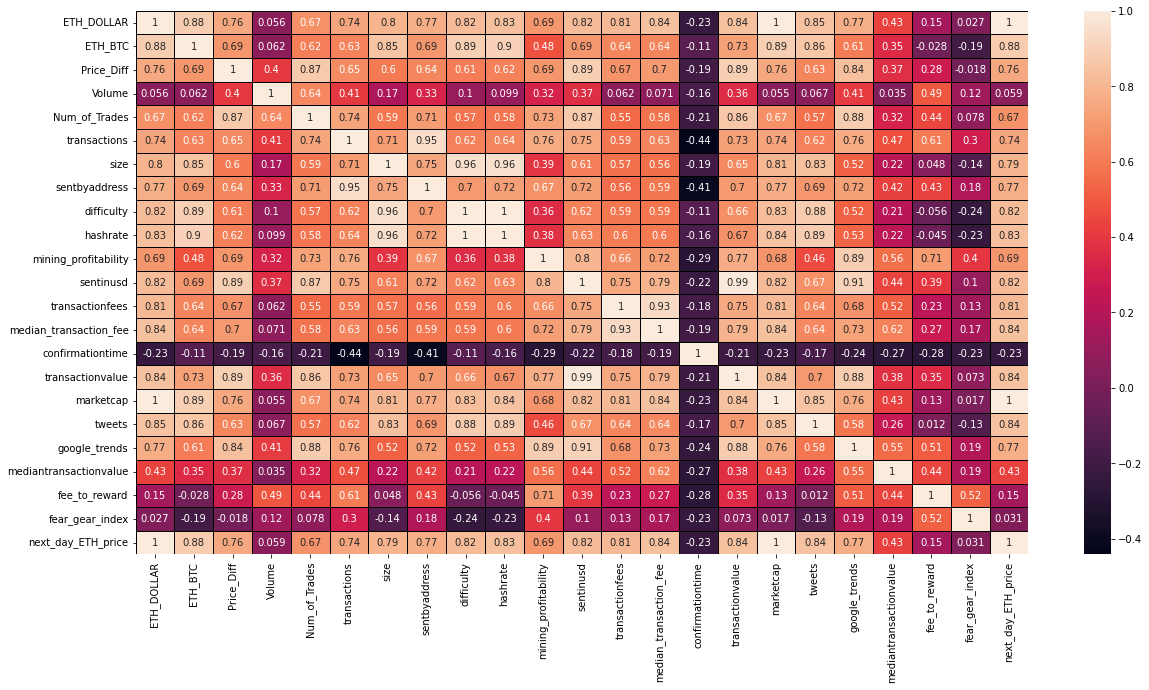

In [6]:
# correlation plot
plt.figure(figsize=(20,10))
data = DF.copy()
cor = data[list(data.columns)].corr(method= 'pearson')
sns.heatmap(cor,annot=True,linecolor='black',linewidths=0.5)
plt.show()

In [8]:
df = pd.read_csv("ETH_TO_USDT_NEW.csv")
#df['Date'] = pd.to_datetime(df['Open Time']/1000, unit='s')
#DF = pd.merge(DF, df, on='Date')
df

,Unnamed: 0,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,0,2017-08-17 00:00:00.000000000,301.13,312.18,298.00,302.00,7.030710e+03,2017-08-17 23:59:59.999000072,2.154655e+06,4522,6224.58999,1.908705e+06,0
1,1,2017-08-18 00:00:00.000000000,302.00,311.79,283.94,293.96,9.537846e+03,2017-08-18 23:59:59.999000072,2.858947e+06,5658,7452.43542,2.240813e+06,0
2,2,2017-08-19 00:00:00.000000000,293.31,299.90,278.00,290.91,2.146198e+03,2017-08-19 23:59:59.999000072,6.200226e+05,1795,1537.97550,4.447136e+05,0
3,3,2017-08-20 00:00:00.000000000,289.41,300.53,282.85,299.10,2.510139e+03,2017-08-20 23:59:59.999000072,7.428479e+05,2038,2186.68739,6.475061e+05,0
4,4,2017-08-21 00:00:00.000000000,299.10,346.52,294.60,323.29,5.219445e+03,2017-08-21 23:59:59.999000072,1.689472e+06,3925,4004.19967,1.297977e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,1837,2022-08-28 00:00:00.000000000,1491.06,1511.00,1424.00,1426.76,5.448464e+05,2022-08-28 23:59:59.999000072,8.056160e+08,756843,264538.03770,3.913692e+08,0
1838,1838,2022-08-29 00:00:00.000000000,1426.76,1559.99,1422.08,1551.80,8.262521e+05,2022-08-29 23:59:59.999000072,1.230281e+09,1099487,418910.98200,6.238724e+08,0
1839,1839,2022-08-30 00:00:00.000000000,1551.79,1606.13,1473.61,1524.59,1.003075e+06,2022-08-30 23:59:59.999000072,1.551626e+09,1292499,498318.37380,7.709880e+08,0
1840,1840,2022-08-31 00:00:00.000000000,1524.59,1619.78,1524.59,1554.10,9.492277e+05,2022-08-31 23:59:59.999000072,1.497596e+09,1471691,472367.89000,7.454302e+08,0


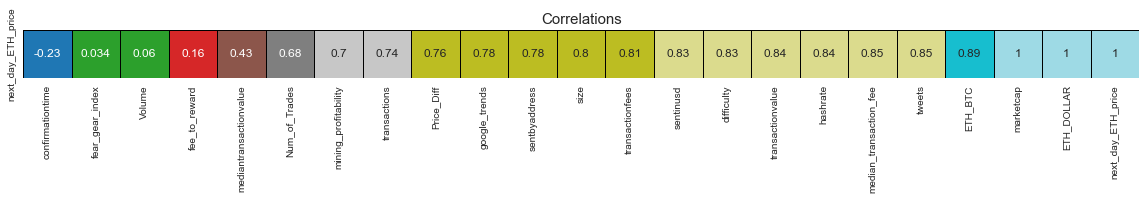

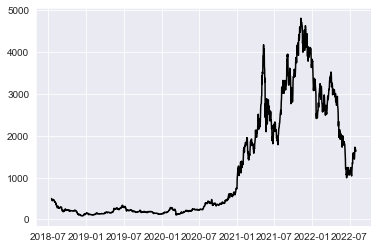

<AxesSubplot:ylabel='Density'>

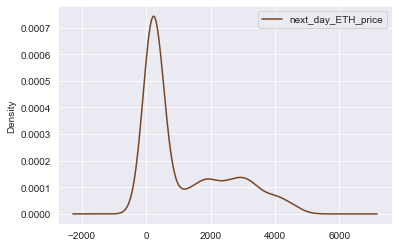

In [59]:
features = ['Low','High','Open','Close','avg_price']
plot(DF,['next_day_ETH_price'],3,3,2)
plt.show()
plt.plot(DF.index,DF['next_day_ETH_price'],color='black')
plt.show()
DF.plot(kind='kde',y='next_day_ETH_price',color=colors[1])

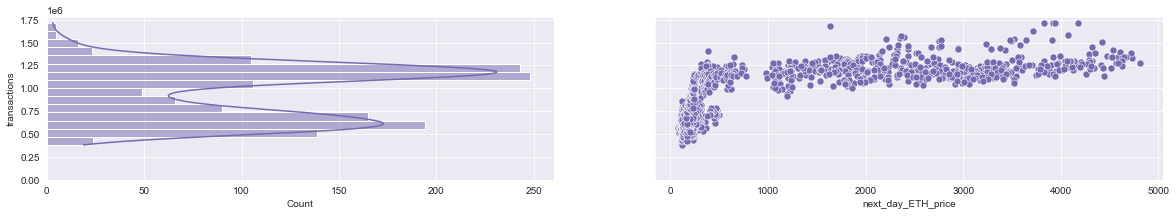

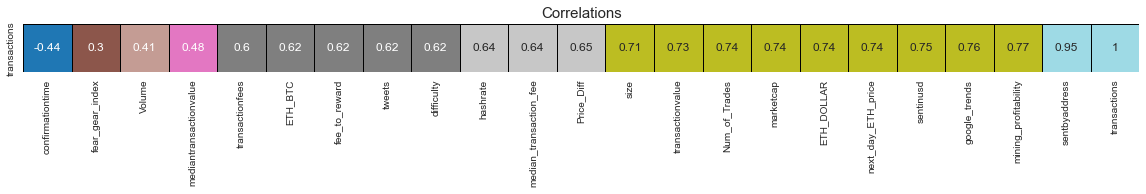

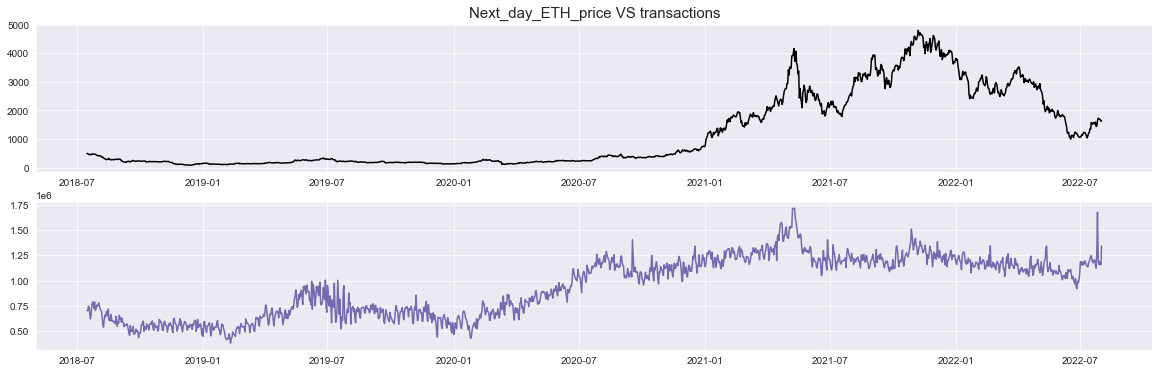

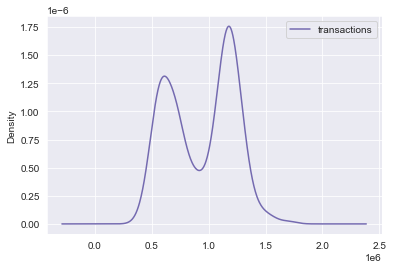

In [62]:
plot(DF,['transactions'],3,1,0)

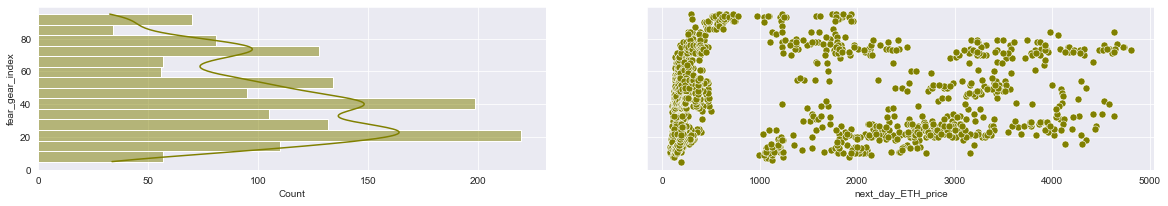

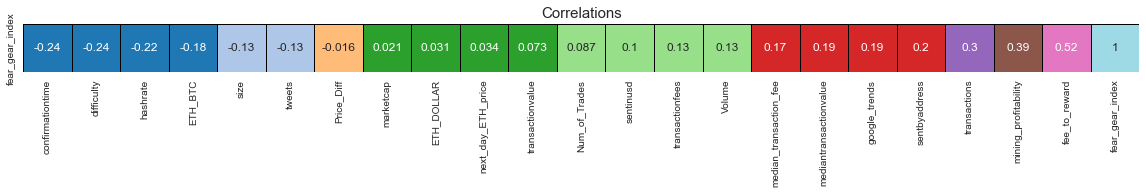

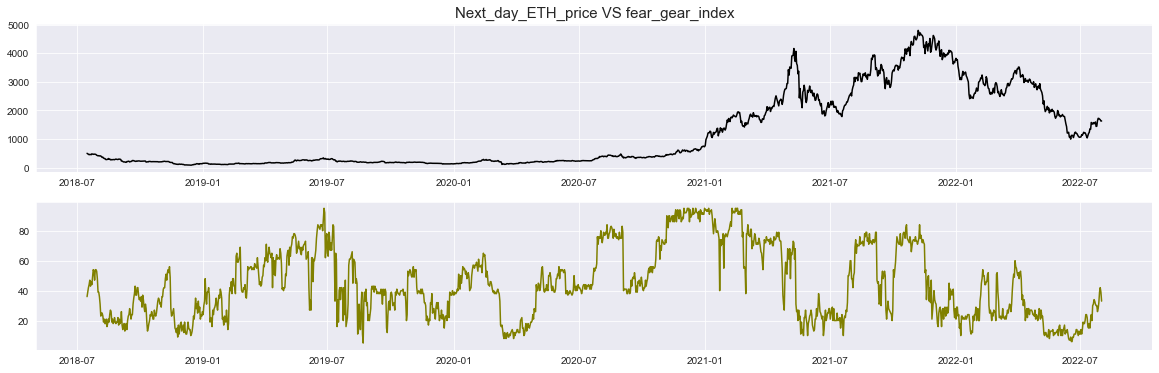

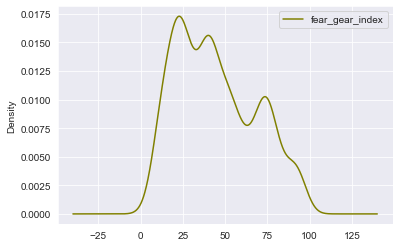

In [63]:
plot(DF,['fear_gear_index'],3,1,3)

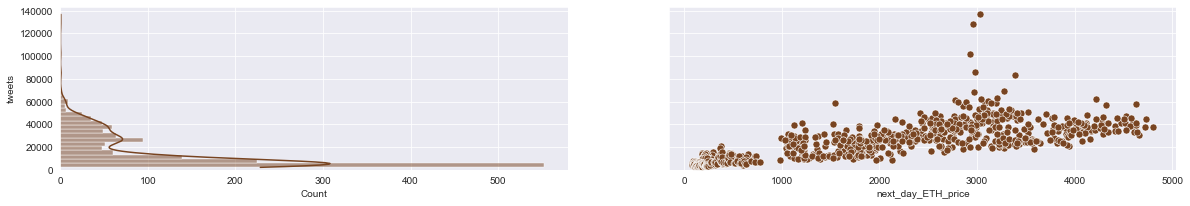

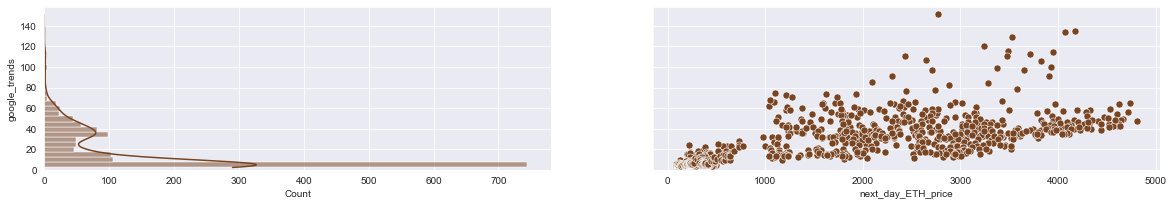

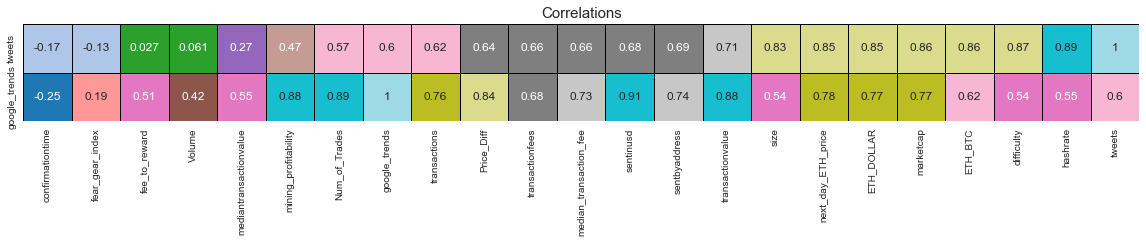

In [69]:
plot(DF,['tweets', 'google_trends'],3,2,1)
plot(DF,['tweets', 'google_trends'],2,3,1)

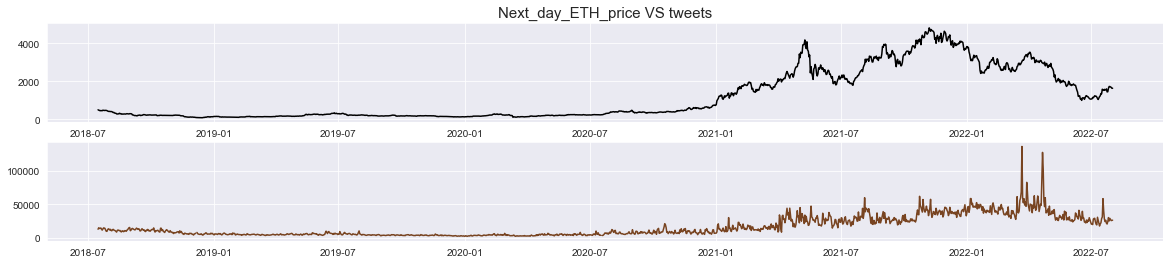

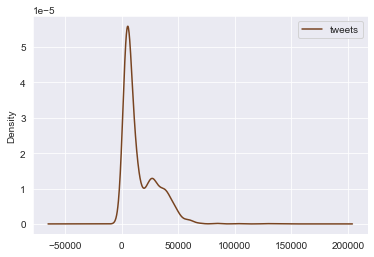

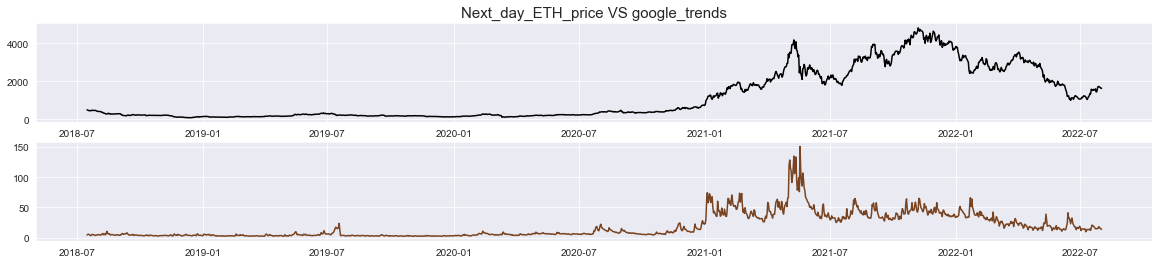

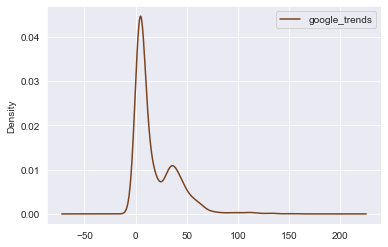

In [70]:
plot(DF,['tweets', 'google_trends'],2,4,1)

# Feature engineering

In [21]:
!pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=dd866ab8673fdc92294daabf4257e8a4177a947588872fddb422e390df39ba87
  Stored in directory: c:\users\nk\appdata\local\pip\cache\wheels\bc\2a\c2\a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
from ta import add_all_ta_features
from ta.utils import dropna
import talib as tb
import matplotlib.pyplot as plt

In [22]:
data_raw_25 = pd.read_csv('LONG_DATASET.csv')
binance_DF = pd.read_csv("ETH_TO_USDT_NEW.csv")
opentime = list(binance_DF["Open Time"])
newtime = []
for time in opentime:
    time = time.split(" ")
    newtime.append(time[0])
binance_DF["Date"] = newtime
DF = pd.merge(data_raw_25, binance_DF, on='Date')

In [23]:
binance_DF.drop(["Open Time", "Unnamed: 0", "Close Time","Volume", "Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume", "Ignore"], axis=1, inplace=True)
DF = pd.merge(data_raw_25, binance_DF, on='Date')
DF.drop(["Classification","mediantransactionvalue"], axis=1, inplace=True)
DF

,Date,ETH_DOLLAR,ETH_BTC,Price_Diff,Volume,Num_of_Trades,transactions,size,sentbyaddress,difficulty,...,transactionvalue,marketcap,tweets,google_trends,fee_to_reward,fear_gear_index,Open,High,Low,Close
0,2018-07-25,472.10,0.057765,21.77,1.704755e+05,118086,787527.0,24159.0,289146.0,3.475588e+15,...,920.126,4.790803e+10,14514.0,5.010,1.963,54,479.24,485.77,464.00,472.10
1,2018-07-26,462.64,0.058309,25.00,1.739762e+05,107846,725630.0,23504.0,247892.0,3.529121e+15,...,814.532,4.805041e+10,14076.0,4.333,1.777,53,472.11,485.00,460.00,462.64
2,2018-07-27,470.09,0.057446,18.16,1.983048e+05,108861,788715.0,22766.0,278263.0,3.503120e+15,...,801.112,4.693933e+10,11581.0,4.171,1.643,47,462.17,474.00,455.84,470.09
3,2018-07-28,469.29,0.056937,11.18,1.568626e+05,81561,703973.0,19586.0,222254.0,3.544916e+15,...,529.209,4.720823e+10,9653.0,3.656,1.961,54,470.09,472.00,460.82,469.29
4,2018-07-29,466.40,0.056777,10.40,1.387476e+05,79843,716308.0,21874.0,233142.0,3.557475e+15,...,500.413,4.705700e+10,9679.0,4.171,1.361,54,468.44,472.00,461.60,466.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2022-08-27,1491.06,0.074420,70.90,7.561367e+05,1015752,1047949.0,86452.0,360054.0,1.231279e+16,...,2029.000,1.822049e+11,30776.0,NaN,2.508,28,1508.18,1518.42,1447.52,1491.06
1495,2022-08-28,1426.76,0.072956,87.00,5.448464e+05,756843,1025044.0,90059.0,347448.0,1.218430e+16,...,2139.000,1.814883e+11,25631.0,NaN,2.499,28,1491.06,1511.00,1424.00,1426.76
1496,2022-08-29,1551.80,0.076500,137.91,8.262521e+05,1099487,1083202.0,94421.0,340164.0,1.253086e+16,...,3120.000,1.814041e+11,31995.0,NaN,3.108,24,1426.76,1559.99,1422.08,1551.80
1497,2022-08-30,1524.59,0.076961,132.52,1.003075e+06,1292499,1051964.0,98774.0,327524.0,1.245787e+16,...,2877.000,1.896728e+11,29235.0,NaN,3.564,27,1551.79,1606.13,1473.61,1524.59


In [20]:
# Add ta features filling NaN values
df = add_all_ta_features(
    DF, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

C:\Users\NK\miniconda3\envs\itsu\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\NK\miniconda3\envs\itsu\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [21]:
df_25 = DF.copy()
raw_features_25 = list(df_25.columns[1:-1])
smoothening_range_25 = [3,7,14,30,90]

In [78]:
for i in raw_features_25:
  for j in smoothening_range_25:
    df_new = pd.DataFrame()

    # Simple moving average:
    df_new[i+'_'+str(j)+'sma'] = tb.SMA(df_25[i], timeperiod=j)

    # Weighted moving average:
    df_new[i+'_'+str(j)+'wma'] = tb.WMA(df_25[i], timeperiod=j)

    # Standard deviation
    df_new[i+'_'+str(j)+'std'] = tb.STDDEV(df_25[i], timeperiod=j, nbdev=1)

    # Variance
    df_new[i+'_'+str(j)+'var'] = tb.VAR(df_25[i], timeperiod=j, nbdev=1)

    # Exponential moving average
    df_new[i+'_'+str(j)+'ema'] = tb.EMA(df_25[i], timeperiod=j)

    # Relative Strength index
    df_new[i+'_'+str(j)+'rsi'] = tb.RSI(df_25[i], timeperiod=j)

    # Rate of change
    df_new[i+'_'+str(j)+'roc'] = tb.ROC(df_25[i], timeperiod=j)

    # Momentum indicator
    df_new[i+'_'+str(j)+'mom'] = tb.MOM(df_25[i], timeperiod=j)

    # Triple exponential  moving average
    df_new[i+'_'+str(j)+'tema'] = tb.TEMA(df_25[i], timeperiod=j)

    # Double exponential moving average
    df_new[i+'_'+str(j)+'dema'] = tb.DEMA(df_25[i], timeperiod=j)

    # Bollinger bands
    df_new[i+'_'+str(j)+'BBupper'], df_new[i+'_'+str(j)+'BBmiddle'], df_new[i+'_'+str(j)+'BBlower'] = tb.BBANDS(df_25[i], timeperiod=j, nbdevup=2, nbdevdn=2, matype=0)
    df_25 = pd.concat([df_25, df_new], axis=1)


In [79]:
df_25.isnull().sum().sort_values(ascending=False).head(50)

tweets_90tema        1479
tweets_90dema        1479
tweets_90rsi         1426
tweets_90std         1425
tweets_90var         1425
tweets_90BBmiddle    1425
tweets_90BBlower     1425
tweets_90ema         1425
tweets_90BBupper     1425
tweets_90sma         1425
tweets_90wma         1425
tweets_30tema        1423
tweets_30dema        1394
tweets_14tema        1375
tweets_30rsi         1366
tweets_30BBlower     1365
tweets_30sma         1365
tweets_30wma         1365
tweets_30std         1365
tweets_30BBmiddle    1365
tweets_30var         1365
tweets_30ema         1365
tweets_30BBupper     1365
tweets_14dema        1362
tweets_7tema         1354
tweets_14rsi         1350
tweets_14sma         1349
tweets_14wma         1349
tweets_14BBlower     1349
tweets_14std         1349
tweets_14BBupper     1349
tweets_14BBmiddle    1349
tweets_14var         1349
tweets_14ema         1349
tweets_7dema         1348
tweets_7rsi          1343
tweets_7BBlower      1342
tweets_3tema         1342
tweets_7BBup

In [47]:
df_25_final = df_25.iloc[267:,:]
df_25_final

,Open,High,Low,Close,Volume,High_3sma,High_3wma,High_3std,High_3var,High_3ema,...,Close_90var,Close_90ema,Close_90rsi,Close_90roc,Close_90mom,Close_90tema,Close_90dema,Close_90BBupper,Close_90BBmiddle,Close_90BBlower
267,722.52,737.23,663.00,676.96,2.169535e+05,755.950000,752.031667,13.752908,189.142467,755.399186,...,29476.245205,653.589036,50.754670,-20.465253,-174.19,625.043104,644.021822,997.832169,654.459222,311.086275
268,676.96,690.20,633.20,684.11,1.668011e+05,732.436667,719.156667,32.705327,1069.638422,722.799593,...,29218.757754,654.259827,50.884515,-15.436532,-124.88,627.844601,645.558929,994.941570,653.071667,311.201763
269,684.56,742.00,666.31,729.08,1.360224e+05,723.143333,723.938333,23.375709,546.423756,732.399797,...,28773.724161,655.904226,51.694588,-15.874737,-137.58,633.437752,649.002816,990.799388,651.543000,312.286612
270,729.08,743.90,686.00,727.49,1.834669e+05,725.366667,734.316667,24.878683,618.948889,738.149898,...,28434.980643,657.477540,51.664121,-13.555616,-114.08,638.696833,652.266544,987.528943,650.275444,313.021945
271,727.49,740.00,695.00,704.91,1.271912e+05,741.966667,741.633333,1.592343,2.535556,739.074949,...,27659.580293,658.520011,51.230526,-23.303485,-214.18,642.280790,654.443103,980.519059,647.895667,315.272274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,1724.52,1765.99,1655.02,1721.68,1.205267e+06,1731.740000,1751.998333,62.205721,3869.551667,1727.088166,...,246289.184735,1691.725123,47.042354,-36.857547,-1004.98,1125.176695,1158.558132,2637.499178,1644.948556,652.397933
1808,1721.68,1744.85,1673.01,1697.00,7.351325e+05,1765.210000,1758.553333,16.314762,266.171467,1735.969083,...,230694.779035,1691.841054,46.874182,-39.925163,-1127.81,1149.428934,1170.505403,2593.031260,1632.417333,671.803407
1809,1697.00,1754.69,1666.00,1678.12,6.963268e+05,1755.176667,1753.293333,8.637227,74.601689,1745.329542,...,213896.809290,1691.539492,46.744909,-41.253404,-1178.42,1171.671236,1181.366834,2544.303365,1619.323778,694.344190
1810,1678.12,1704.68,1606.12,1630.28,8.015666e+05,1734.740000,1728.045000,21.631907,467.939400,1725.004771,...,198722.040413,1690.193130,46.416894,-41.392674,-1151.42,1190.112101,1189.916285,2498.095229,1606.530222,714.965215


In [100]:
binance_DF = pd.read_csv("ETH_dataset_from_BINANCE.csv")
opentime = list(binance_DF["Open Time"])
newtime = []
for time in opentime:
    time = time.split(" ")
    newtime.append(time[0])
binance_DF["Date"] = newtime
binance_DF.drop(["Open Time","Unnamed: 0", "Close Time","Volume", "Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume", "Ignore"], axis=1, inplace=True)
DF = binance_DF
DF

,Open,High,Low,Close,Date
0,301.13,312.18,298.00,302.00,2017-08-17
1,302.00,311.79,283.94,293.96,2017-08-18
2,293.31,299.90,278.00,290.91,2017-08-19
3,289.41,300.53,282.85,299.10,2017-08-20
4,299.10,346.52,294.60,323.29,2017-08-21
...,...,...,...,...,...
1807,1724.52,1765.99,1655.02,1721.68,2022-07-29
1808,1721.68,1744.85,1673.01,1697.00,2022-07-30
1809,1697.00,1754.69,1666.00,1678.12,2022-07-31
1810,1678.12,1704.68,1606.12,1630.28,2022-08-01


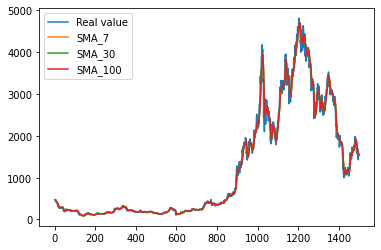

In [25]:
DF["SMA_7"] = tb.SMA(DF.Close, 7)
DF["SMA_30"] = tb.SMA(DF.Close, 7)
DF["SMA_100"] = tb.SMA(DF.Close, 7)
plt.plot(DF.Close, label="Real value")
plt.plot(DF.SMA_7, label="SMA_7")
plt.plot(DF.SMA_30, label="SMA_30")
plt.plot(DF.SMA_100, label="SMA_100")
plt.legend()
plt.show()


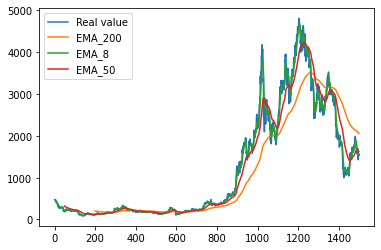

In [28]:
DF["EMA_200"] = tb.EMA(DF.Close, 200)
DF["EMA_8"] = tb.EMA(DF.Close, 8)
DF["EMA_50"] = tb.EMA(DF.Close, 50)
plt.plot(DF.Close, label="Real value")
plt.plot(DF.EMA_200, label="EMA_200")
plt.plot(DF.EMA_8, label="EMA_8")
plt.plot(DF.EMA_50, label="EMA_50")
plt.legend()
plt.show()


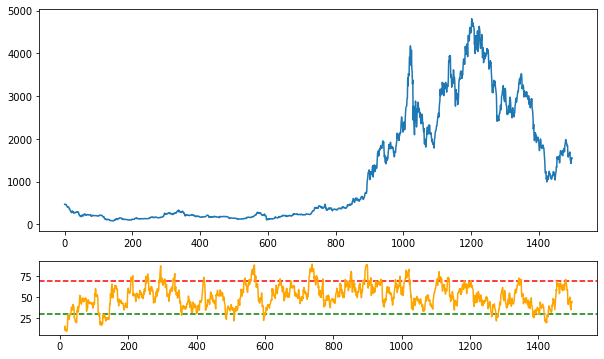

In [29]:
DF["RSI"] = tb.RSI(DF.Close)
fix, axs = plt.subplots(2,1, gridspec_kw={"height_ratios": [3,1]}, figsize=(10, 6))

axs[0].plot(DF.Close)
axs[1].axhline(y=70, color="r", linestyle="--")
axs[1].axhline(y=30, color="g", linestyle="--")
axs[1].plot(DF.RSI, color="orange")

,Date,ETH_DOLLAR,ETH_BTC,Price_Diff,Volume,Num_of_Trades,transactions,size,sentbyaddress,difficulty,...,SMA_7,SMA_30,SMA_100,EMA_200,EMA_8,EMA_50,RSI,macd,macd_signal,macd_hist
0,2018-07-25,472.10,0.057765,21.77,1.704755e+05,118086,787527.0,24159.0,289146.0,3.475588e+15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-26,462.64,0.058309,25.00,1.739762e+05,107846,725630.0,23504.0,247892.0,3.529121e+15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-27,470.09,0.057446,18.16,1.983048e+05,108861,788715.0,22766.0,278263.0,3.503120e+15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-28,469.29,0.056937,11.18,1.568626e+05,81561,703973.0,19586.0,222254.0,3.544916e+15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-29,466.40,0.056777,10.40,1.387476e+05,79843,716308.0,21874.0,233142.0,3.557475e+15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2022-08-27,1491.06,0.074420,70.90,7.561367e+05,1015752,1047949.0,86452.0,360054.0,1.231279e+16,...,1608.444286,1608.444286,1608.444286,2077.546756,1612.923864,1635.906773,38.117013,-21.251273,21.373116,-42.624389
1495,2022-08-28,1426.76,0.072956,87.00,5.448464e+05,756843,1025044.0,90059.0,347448.0,1.218430e+16,...,1581.105714,1581.105714,1581.105714,2071.071266,1571.554117,1627.704939,35.069049,-37.252608,9.647971,-46.900579
1496,2022-08-29,1551.80,0.076500,137.91,8.262521e+05,1099487,1083202.0,94421.0,340164.0,1.253086e+16,...,1570.697143,1570.697143,1570.697143,2065.904388,1567.164313,1624.728274,44.382766,-39.390034,-0.159630,-39.230405
1497,2022-08-30,1524.59,0.076961,132.52,1.003075e+06,1292499,1051964.0,98774.0,327524.0,1.245787e+16,...,1550.580000,1550.580000,1550.580000,2060.518175,1557.703354,1620.801283,42.939351,-42.786365,-8.684977,-34.101388


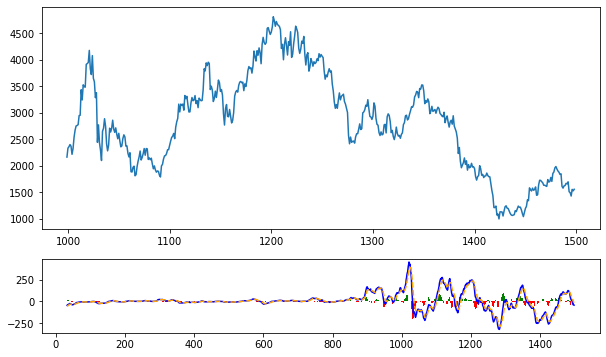

In [33]:
macd, macd_signal, macd_hist = tb.MACD(DF.Close)
fix, axs = plt.subplots(2,1, gridspec_kw={"height_ratios": [3,1]}, figsize=(10, 6))
c = ["red" if cl < 0 else "green" for cl in macd_hist]
axs[0].plot(DF.Close[-500:])

axs[1].plot(macd, "b-")
axs[1].plot(macd_signal, "--", color="orange")
axs[1].bar(macd_hist.index, macd_hist, color=c)

DF["macd"] = macd
DF["macd_signal"] = macd_signal
DF['macd_hist'] = macd_hist
DF

In [34]:
DF["ENGULFING"] = tb.CDLENGULFING(DF.Open, DF.High, DF.Low, DF.Close)
DF['Date'] = pd.to_datetime(DF['Date'])
DF = DF.set_index('Date')
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1499 entries, 2018-07-25 to 2022-08-31
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ETH_DOLLAR              1499 non-null   float64
 1   ETH_BTC                 1499 non-null   float64
 2   Price_Diff              1499 non-null   float64
 3   Volume                  1499 non-null   float64
 4   Num_of_Trades           1499 non-null   int64  
 5   transactions            1499 non-null   float64
 6   size                    1425 non-null   float64
 7   sentbyaddress           1499 non-null   float64
 8   difficulty              1499 non-null   float64
 9   hashrate                1499 non-null   float64
 10  mining_profitability    1499 non-null   float64
 11  sentinusd               1499 non-null   float64
 12  transactionfees         1499 non-null   float64
 13  median_transaction_fee  1499 non-null   float64
 14  confirmationtime      

In [4]:
import mplfinance as mpf
import talib as tb

In [7]:
binance_DF = pd.read_csv("ETH_dataset_from_BINANCE.csv")
opentime = list(binance_DF["Open Time"])
newtime = []
for time in opentime:
    time = time.split(" ")
    newtime.append(time[0])
binance_DF["Date"] = newtime
binance_DF.drop(["Open Time","Unnamed: 0", "Close Time","Volume", "Quote Asset Volume", "Number of Trades", "TB Base Volume", "TB Quote Volume", "Ignore"], axis=1, inplace=True)
DF = binance_DF
DF["ENGULFING"] = tb.CDLENGULFING(DF.Open, DF.High, DF.Low, DF.Close)
DF['Date'] = pd.to_datetime(DF['Date'])
DF = DF.set_index('Date')

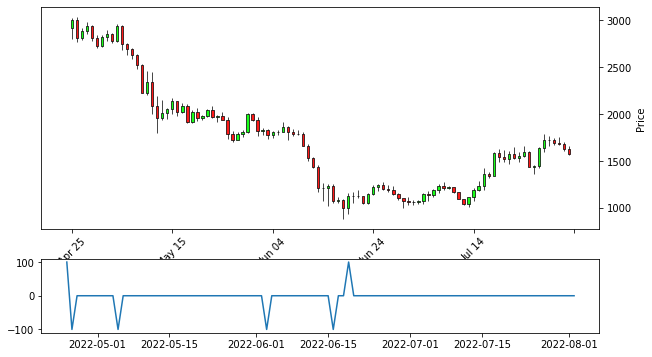

In [8]:
fix, axs = plt.subplots(2,1, gridspec_kw={"height_ratios": [3,1]}, figsize=(10, 6))

colors = mpf.make_marketcolors(up="#00ff00",
                             down="#ff0000")
mpf_style = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=colors)

mpf.plot(DF[-100:], type="candle", ax=axs[0], style=mpf_style)
axs[1].plot(DF.ENGULFING[-100:])

In [35]:
DF["BB_upper"], DF["BB_middle"], DF["DD_lower"] = tb.BBANDS(DF.Close, timeperiod=10, nbdevup=2, nbdevdn=2)
DF

,ETH_DOLLAR,ETH_BTC,Price_Diff,Volume,Num_of_Trades,transactions,size,sentbyaddress,difficulty,hashrate,...,EMA_8,EMA_50,RSI,macd,macd_signal,macd_hist,ENGULFING,BB_upper,BB_middle,DD_lower
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-25,472.10,0.057765,21.77,1.704755e+05,118086,787527.0,24159.0,289146.0,3.475588e+15,2.899235e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2018-07-26,462.64,0.058309,25.00,1.739762e+05,107846,725630.0,23504.0,247892.0,3.529121e+15,2.874467e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2018-07-27,470.09,0.057446,18.16,1.983048e+05,108861,788715.0,22766.0,278263.0,3.503120e+15,2.869437e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2018-07-28,469.29,0.056937,11.18,1.568626e+05,81561,703973.0,19586.0,222254.0,3.544916e+15,2.882692e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2018-07-29,466.40,0.056777,10.40,1.387476e+05,79843,716308.0,21874.0,233142.0,3.557475e+15,2.895135e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,1491.06,0.074420,70.90,7.561367e+05,1015752,1047949.0,86452.0,360054.0,1.231279e+16,9.395973e+14,...,1612.923864,1635.906773,38.117013,-21.251273,21.373116,-42.624389,0,1819.507541,1629.055,1438.602459
2022-08-28,1426.76,0.072956,87.00,5.448464e+05,756843,1025044.0,90059.0,347448.0,1.218430e+16,9.236874e+14,...,1571.554117,1627.704939,35.069049,-37.252608,9.647971,-46.900579,0,1750.505900,1587.092,1423.678100
2022-08-29,1551.80,0.076500,137.91,8.262521e+05,1099487,1083202.0,94421.0,340164.0,1.253086e+16,9.645778e+14,...,1567.164313,1624.728274,44.382766,-39.390034,-0.159630,-39.230405,0,1745.319876,1581.371,1417.422124


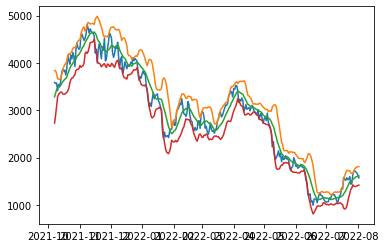

In [26]:
plt.plot(DF.Close[-300:])
plt.plot(DF.BB_upper[-300:])
plt.plot(DF.BB_middle[-300:])
plt.plot(DF.DD_lower[-300:])

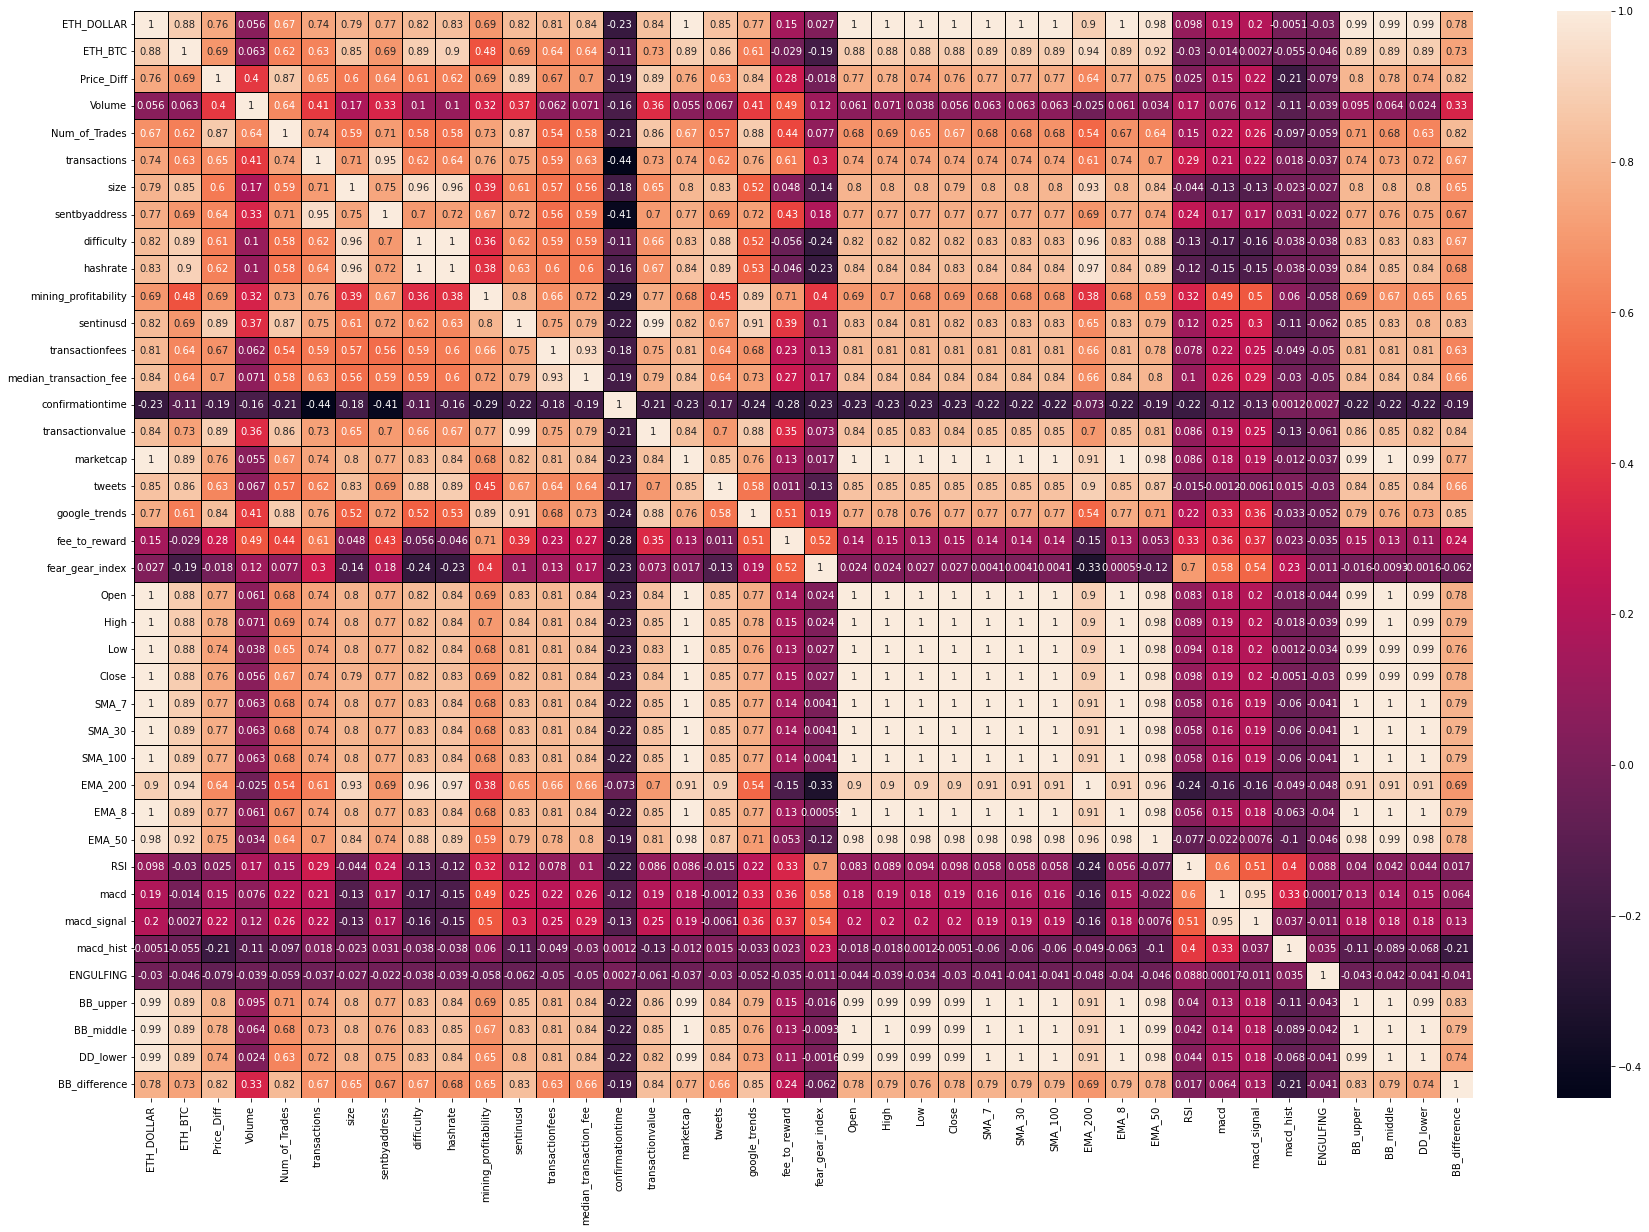

In [42]:
plt.figure(figsize=(30,20))
data = DF.copy()
cor = data[list(data.columns)].corr(method= 'pearson')
sns.heatmap(cor,annot=True,linecolor='black',linewidths=0.5)
plt.show()

In [41]:
DF["BB_difference"] = DF["BB_upper"] - DF["DD_lower"]
DF
#DF.to_csv("big_DF.csv", index=False)

,ETH_DOLLAR,ETH_BTC,Price_Diff,Volume,Num_of_Trades,transactions,size,sentbyaddress,difficulty,hashrate,...,EMA_50,RSI,macd,macd_signal,macd_hist,ENGULFING,BB_upper,BB_middle,DD_lower,BB_difference
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-25,472.10,0.057765,21.77,1.704755e+05,118086,787527.0,24159.0,289146.0,3.475588e+15,2.899235e+14,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2018-07-26,462.64,0.058309,25.00,1.739762e+05,107846,725630.0,23504.0,247892.0,3.529121e+15,2.874467e+14,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2018-07-27,470.09,0.057446,18.16,1.983048e+05,108861,788715.0,22766.0,278263.0,3.503120e+15,2.869437e+14,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2018-07-28,469.29,0.056937,11.18,1.568626e+05,81561,703973.0,19586.0,222254.0,3.544916e+15,2.882692e+14,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2018-07-29,466.40,0.056777,10.40,1.387476e+05,79843,716308.0,21874.0,233142.0,3.557475e+15,2.895135e+14,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-27,1491.06,0.074420,70.90,7.561367e+05,1015752,1047949.0,86452.0,360054.0,1.231279e+16,9.395973e+14,...,1635.906773,38.117013,-21.251273,21.373116,-42.624389,0,1819.507541,1629.055,1438.602459,380.905082
2022-08-28,1426.76,0.072956,87.00,5.448464e+05,756843,1025044.0,90059.0,347448.0,1.218430e+16,9.236874e+14,...,1627.704939,35.069049,-37.252608,9.647971,-46.900579,0,1750.505900,1587.092,1423.678100,326.827800
2022-08-29,1551.80,0.076500,137.91,8.262521e+05,1099487,1083202.0,94421.0,340164.0,1.253086e+16,9.645778e+14,...,1624.728274,44.382766,-39.390034,-0.159630,-39.230405,0,1745.319876,1581.371,1417.422124,327.897753
